# Predicting Fuel Consumption for cars

In [130]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [131]:
data=pd.read_csv("auto_mpg_dataset.csv",sep=",")

In [132]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [133]:
#shape of data
data.shape

(398, 9)

In [134]:
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [135]:
#columns of data
data.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'car_name', 'mpg'],
      dtype='object')

In [136]:
data["car_name"].nunique()

305

In [137]:
data["car_name"].value_counts().head(50)

ford pinto                           6
toyota corolla                       5
amc matador                          5
ford maverick                        5
chevrolet chevette                   4
amc gremlin                          4
chevrolet impala                     4
peugeot 504                          4
amc hornet                           4
toyota corona                        4
ford gran torino                     3
chevrolet caprice classic            3
honda civic                          3
volkswagen dasher                    3
dodge colt                           3
chevrolet citation                   3
chevrolet nova                       3
pontiac catalina                     3
plymouth fury iii                    3
ford galaxie 500                     3
chevrolet vega                       3
plymouth duster                      3
amc matador (sw)                     2
volkswagen rabbit                    2
ford gran torino (sw)                2
honda civic cvcc         

In [138]:
data["car_name"].values[:10]

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl'], dtype=object)

In [139]:
data['brand'] = data["car_name"].str.extract('(^.*?)\s')
#brands=data["brand"]
#brands=data["brand"].unique().astype('str')
#brands
data["brand"].value_counts()[:10]


ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: brand, dtype: int64

In [140]:
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,chevrolet
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,buick
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,plymouth
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,amc
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,ford
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0,ford
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0,vw
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0,dodge
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0,ford


In [141]:
data['brand'] = data['brand'].replace(['volkswagen','vokswagen','vw'],'VW')
data['brand'] = data['brand'].replace(['chevrolet','chevy','chevroelt'],'chevrolet')
data['brand'] = data['brand'].replace('maxda','mazda')
data['brand'] = data['brand'].replace('toyouta','toyota')
data['brand'] = data['brand'].replace('mercedes','mercedes-benz')
data['brand'] = data['brand'].replace('nissan','datsun')
data['brand'] = data['brand'].replace('capri','ford')
data['brand'] = data['brand'].replace('nissan','datsun')

In [142]:
#Checking for any null values in brand
data[data['brand'].isnull()]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
150,4,108.0,93.0,2391.0,15.5,74,3,subaru,26.0,NaN
346,4,97.0,67.0,2065.0,17.8,81,3,subaru,32.3,NaN


**We found that there are two null values**

*We can fill those values with their car name "subaru"*

In [143]:
data['brand'].fillna(value = 'subaru',inplace=True)

In [144]:
data["brand"]=data["brand"].str.capitalize()

In [145]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0,Ford


In [146]:
def country(x):
    if x==1:
        return "USA"
    elif x==2:
        return "Europe"
    elif x==3:
        return "Japan"

In [147]:
data["origin"]=data["origin"].apply(country)

In [148]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,17.0,Ford


In [149]:
#Range of horsepower
print("minimum value: {} \nmaximum value : {}".format(data["horsepower"].min(),data.horsepower.max()))

minimum value: -100000.0 
maximum value : 230.0


**There are few data points which have horsepower as -10000**

**Let's get those data points** 


In [150]:
data[data["horsepower"]<=0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
336,4,140.0,-100000.0,2905.0,14.3,80,USA,ford mustang cobra,23.6,Ford
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault
374,4,151.0,-100000.0,3035.0,20.5,82,USA,amc concord dl,23.0,Amc


In [151]:
data[data["car_name"]=="ford pinto"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
32,4,98.0,-100000.0,2046.0,19.0,71,USA,ford pinto,25.0,Ford
112,4,122.0,85.0,2310.0,18.5,73,USA,ford pinto,19.0,Ford
130,4,122.0,80.0,2451.0,16.5,74,USA,ford pinto,26.0,Ford
168,4,140.0,83.0,2639.0,17.0,75,USA,ford pinto,23.0,Ford
174,6,171.0,97.0,2984.0,14.5,75,USA,ford pinto,18.0,Ford
206,4,140.0,72.0,2565.0,13.6,76,USA,ford pinto,26.5,Ford


In [152]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,-100000.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [153]:
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


**We noticed that car_name as renault 18i has only one data point**

*So, for these situations we can see their brand*

In [154]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,-100000.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,-100000.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


*Array of car_names which have horsepower < 0*

In [155]:
cars=data[data["horsepower"]<=0]["car_name"].unique()
cars

array(['ford pinto', 'ford maverick', 'renault lecar deluxe',
       'ford mustang cobra', 'renault 18i', 'amc concord dl'],
      dtype=object)

In [156]:

for car in cars:
    med=0
    brand=data[data["car_name"]==cars[3]]["brand"].values
    med=data.loc[(data["car_name"]==car) & (data["horsepower"]>0),"horsepower"].median()
   
    data.loc[(data["car_name"]==car) & (data["horsepower"]<=0),"horsepower"]=np.nan
    data.fillna(med,inplace=True)
    med_brand=data.loc[(data["brand"]==brand[0]) & (data["horsepower"]>0),"horsepower"].median()
    data.fillna(med_brand,inplace=True)

In [157]:
data[data["car_name"]=="ford maverick"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
17,6,200.0,85.0,2587.0,16.0,70,USA,ford maverick,21.0,Ford
100,6,250.0,88.0,3021.0,16.5,73,USA,ford maverick,18.0,Ford
126,6,200.0,83.0,2875.0,17.0,74,USA,ford maverick,21.0,Ford
155,6,250.0,72.0,3158.0,19.5,75,USA,ford maverick,15.0,Ford
193,6,200.0,81.0,3012.0,17.6,76,USA,ford maverick,24.0,Ford


In [158]:
data[data["horsepower"]<=0]
#All outliers have been either filled with their car_name's median value 

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand


In [159]:
#or if the car_name has only single row then it has been filled with the their Brand's median value
data[data["car_name"]=="renault 18i"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


In [160]:
data[data["brand"]=="Renault"]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg,brand
79,4,96.0,69.0,2189.0,18.0,72,Europe,renault 12 (sw),26.0,Renault
186,4,101.0,83.0,2202.0,15.3,76,Europe,renault 12tl,27.0,Renault
218,4,79.0,58.0,1825.0,18.6,77,Europe,renault 5 gtl,36.0,Renault
330,4,85.0,89.0,1835.0,17.3,80,Europe,renault lecar deluxe,40.9,Renault
354,4,100.0,89.0,2320.0,15.8,81,Europe,renault 18i,34.5,Renault


**Number of brands from each origin**

In [161]:
plt.figure(figsize=(20,8))
brands_USA=data[data["origin"]=="USA"]["brand"]
brands_Europe=data[data["origin"]=="Europe"]["brand"]
brands_Japan=data[data["origin"]=="Japan"]["brand"]
brand_origin=pd.DataFrame([["USA",brands_USA.nunique()],["Europe",brands_Europe.nunique()],["Japan",brands_Japan.nunique()]],
                          columns=["Origin Country","Total no. of brands"])
brand_origin


,Origin Country,Total no. of brands
0,USA,12
1,Europe,11
2,Japan,5


<Figure size 1440x576 with 0 Axes>

**Number of unique car_names** 

In [162]:
data["car_name"].nunique()

305

***Most of the car_names are unique. So there is no useful information in that column. Let's drop that column***


In [163]:
data.drop("car_name",axis=1,inplace=True)

**Correlation of data**

In [164]:
data.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
cylinders,1.000000,0.950721,0.841842,0.896017,-0.505419,-0.348746,-0.775396
displacement,0.950721,1.000000,0.896334,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.841842,0.896334,1.000000,0.863053,-0.687740,-0.413533,-0.773662
weight,0.896017,0.932824,0.863053,1.000000,-0.417457,-0.306564,-0.831741
acceleration,-0.505419,-0.543684,-0.687740,-0.417457,1.000000,0.288137,0.420289
model_year,-0.348746,-0.370164,-0.413533,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773662,-0.831741,0.420289,0.579267,1.000000


## 4. Data visualization

In [165]:
#Setting palette
sns.set_palette("bright")

In [166]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,17.0,Ford


### 4.5 Pie charts

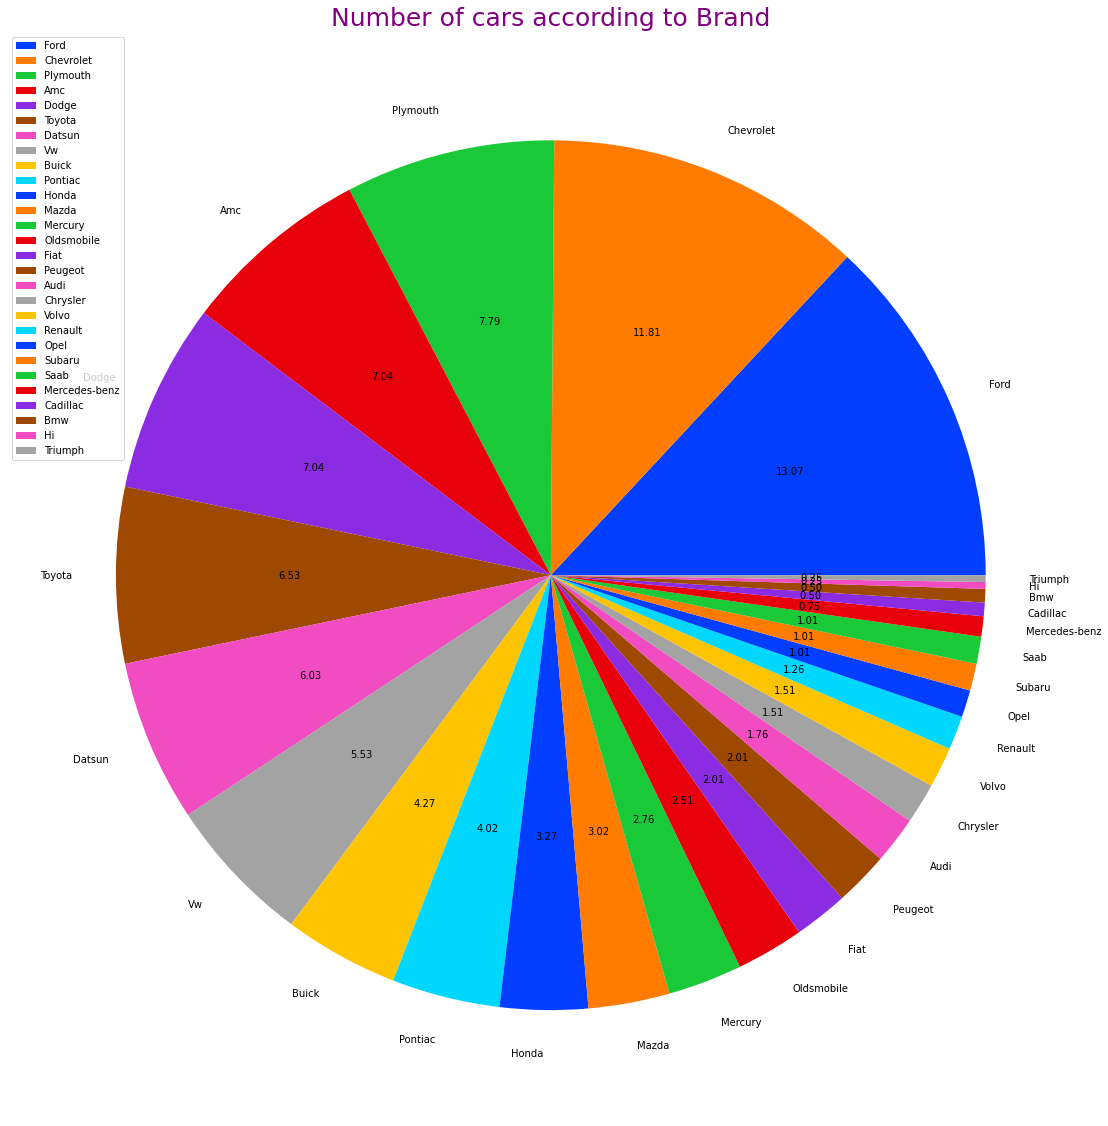

In [167]:
plt.figure(figsize=(20,20))
ax =data["brand"].value_counts()
labels=data["brand"].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars according to Brand",fontsize=25,color='purple')
plt.legend()
plt.show()

***Ford has the most number of cars***

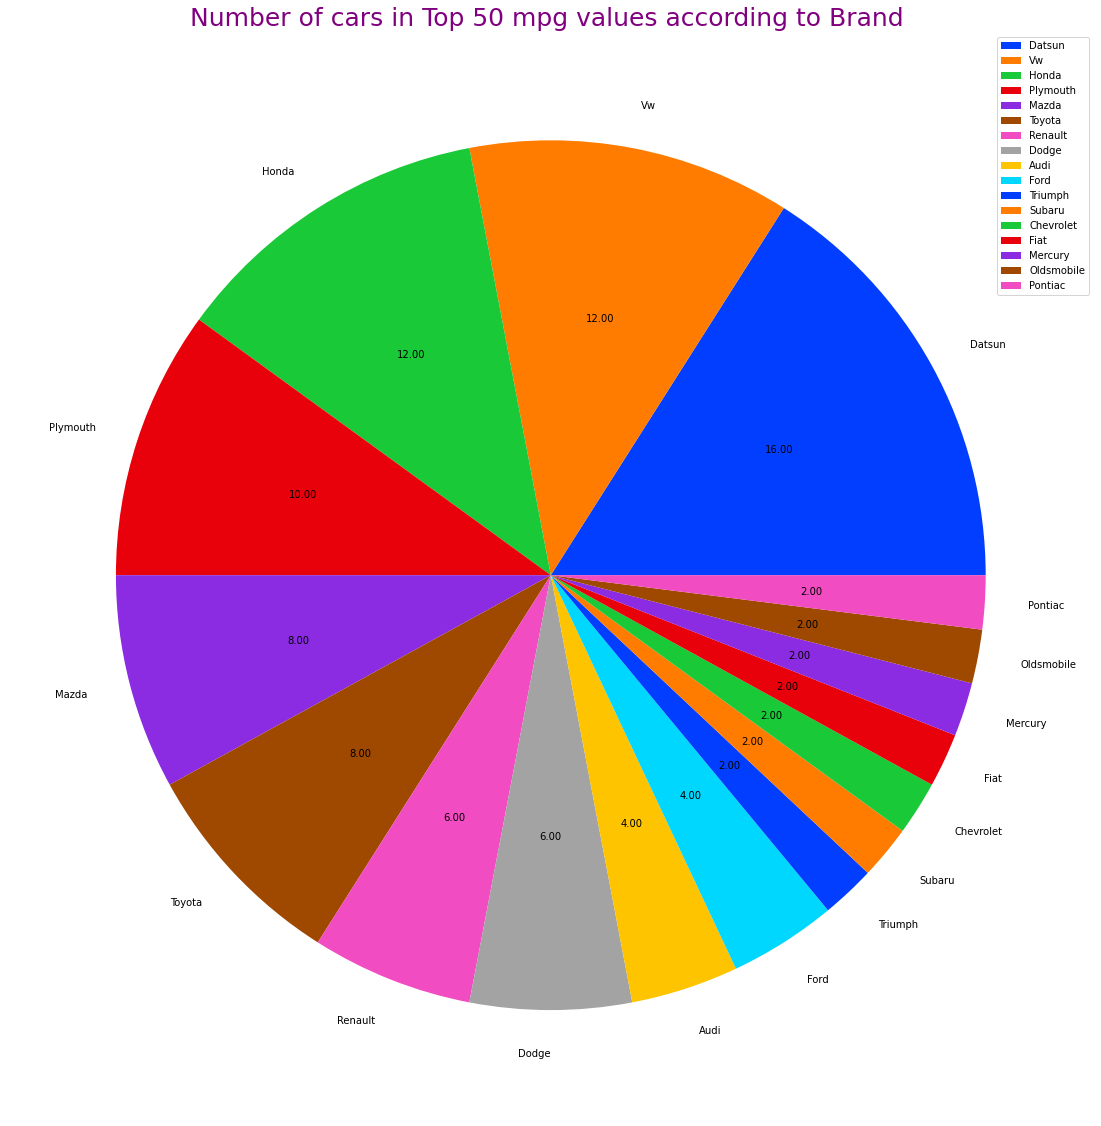

In [168]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["brand"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["brand"][:50].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars in Top 50 mpg values according to Brand ",fontsize=25,color='purple')
plt.legend()
plt.show()

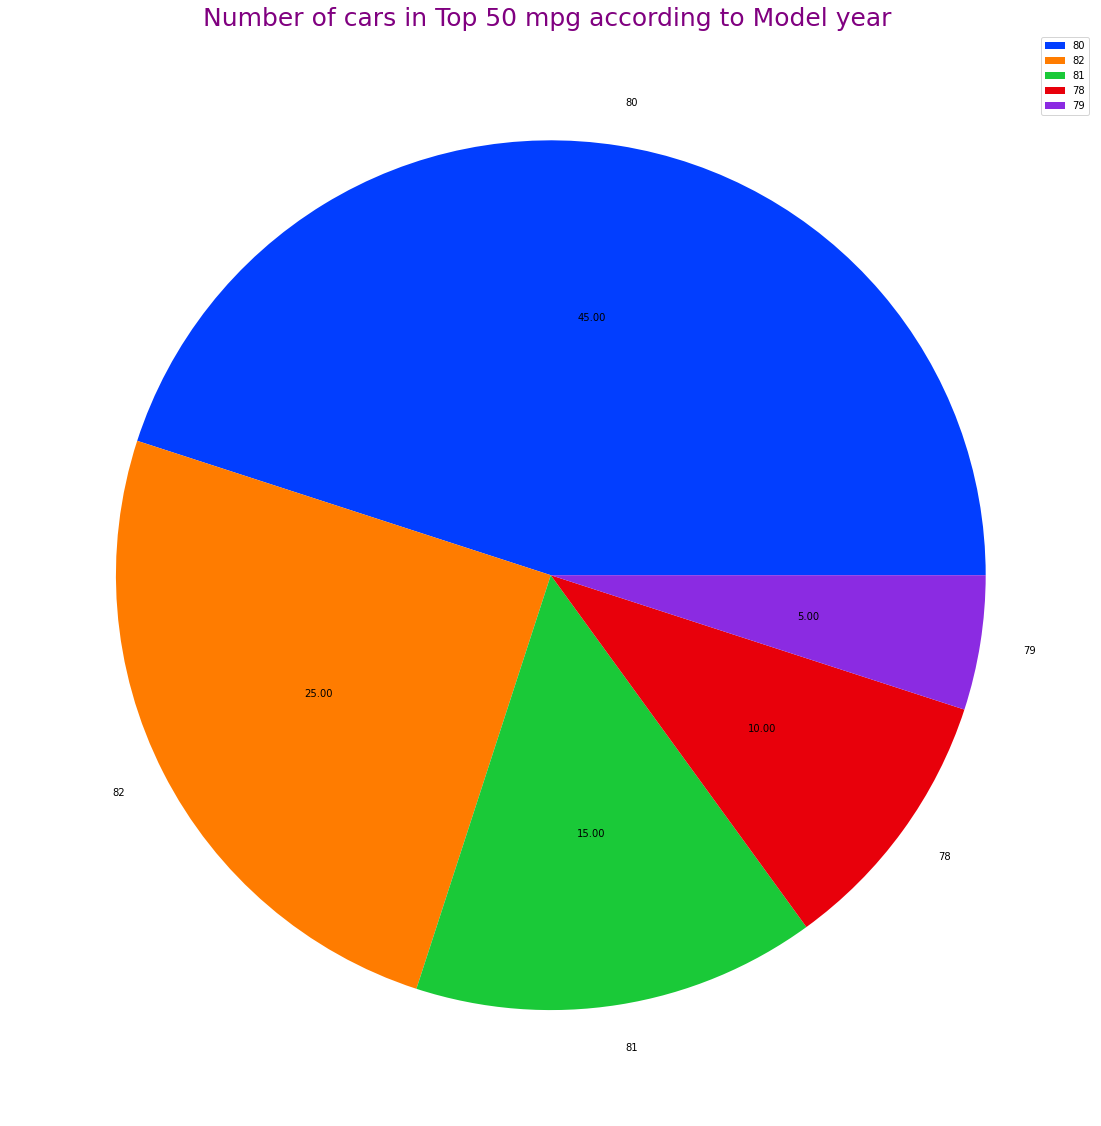

In [169]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["model_year"][:20].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["model_year"][:20].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars in Top 50 mpg according to Model year ",fontsize=25,color='purple')
plt.legend()
plt.show()

***Cars of Model year 80 has the most number of cars in Top 50 cars with highest mpg values***

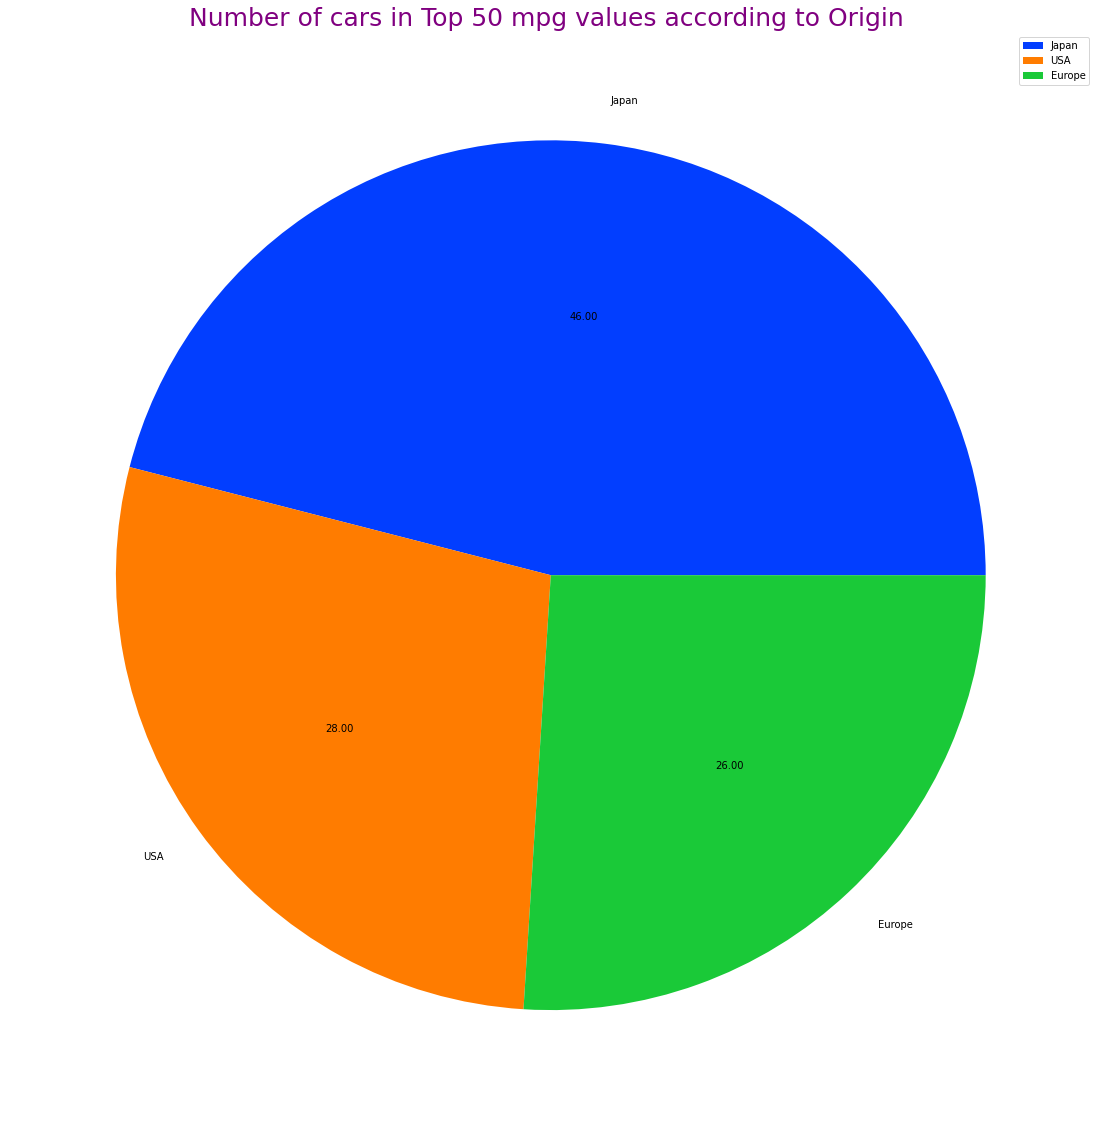

In [170]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["origin"][:50].value_counts().index

plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars in Top 50 mpg values according to Origin ",fontsize=25,color='purple')
plt.legend()
plt.show()

***Japan cars have the most number of cars in Top 50 cars with highest Mpg values***

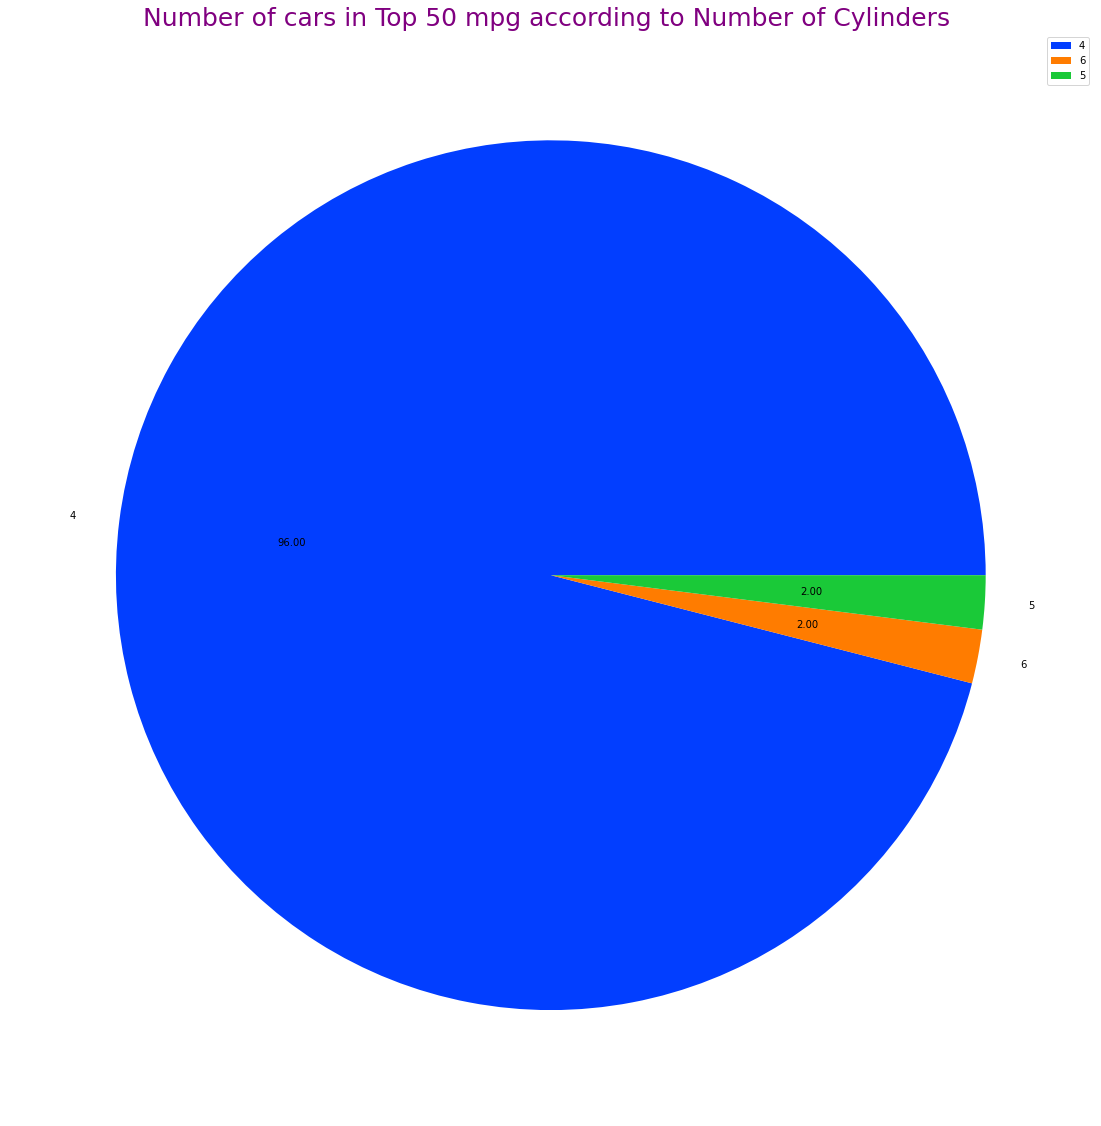

In [171]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts()
labels=data.sort_values(by="mpg",ascending=False)["cylinders"][:50].value_counts().index

plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars in Top 50 mpg according to Number of Cylinders ",fontsize=25,color='purple')
plt.legend()
plt.show()

***Cars with 4 cylinders have the most number of cars(48 cars out of 50) in Top 50 cars with highest Mpg values***

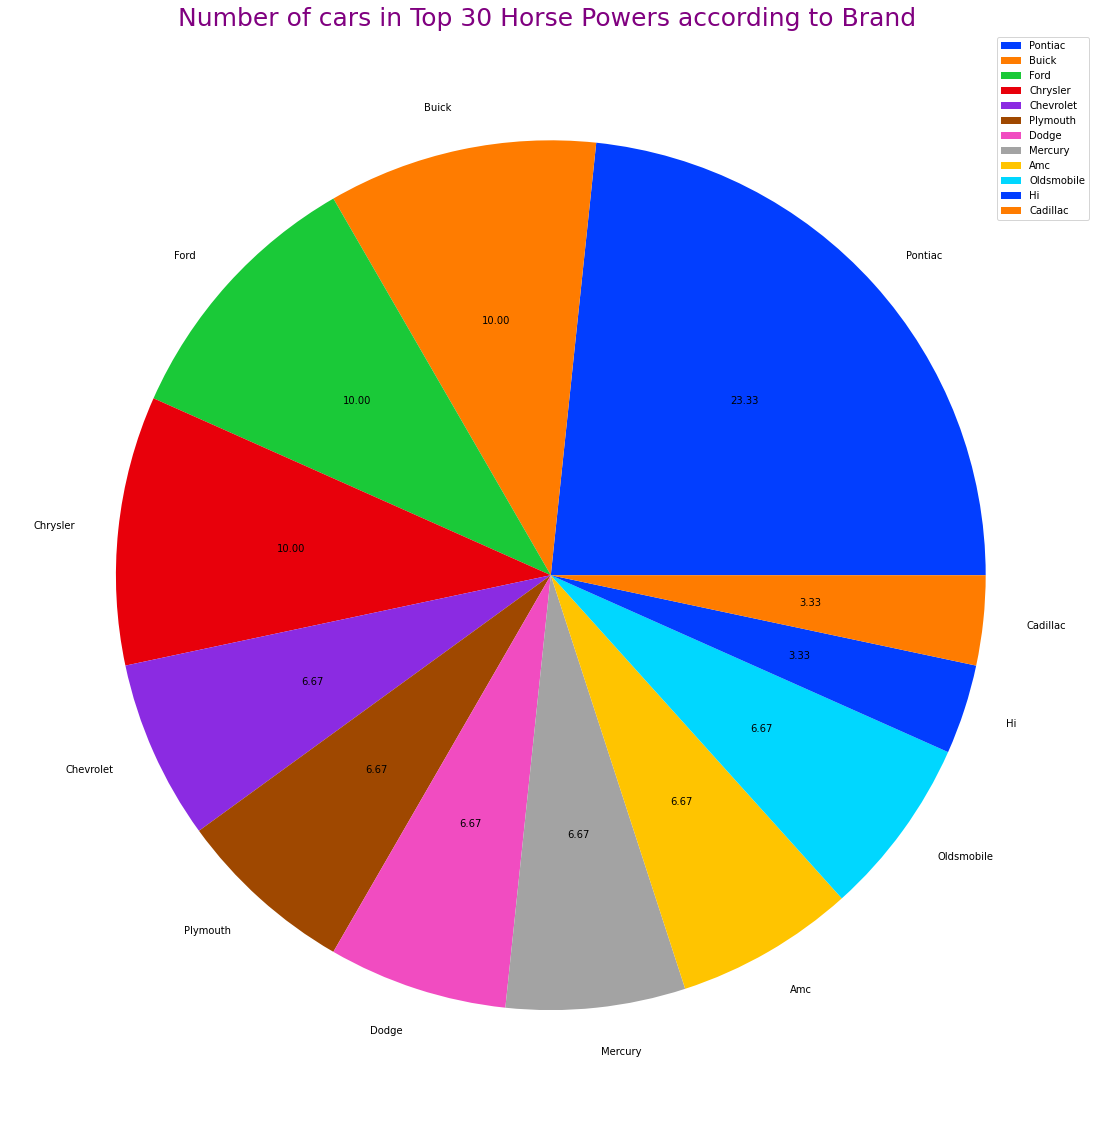

In [172]:
plt.figure(figsize=(20,20))
ax =data.sort_values(by="horsepower",ascending=False)["brand"][:30].value_counts()
labels=data.sort_values(by="horsepower",ascending=False)["brand"][:30].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title("Number of cars in Top 30 Horse Powers according to Brand ",fontsize=25,color='purple')
plt.legend()
plt.show()

***Pontiac cars have the most number of cars in Top 30 cars with Highest Horsepower***

## 5. Data Preprocessing

In [173]:
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,brand
0,8,307.0,130.0,3504.0,12.0,70,USA,18.0,Chevrolet
1,8,350.0,165.0,3693.0,11.5,70,USA,15.0,Buick
2,8,318.0,150.0,3436.0,11.0,70,USA,18.0,Plymouth
3,8,304.0,150.0,3433.0,12.0,70,USA,16.0,Amc
4,8,302.0,140.0,3449.0,10.5,70,USA,17.0,Ford


### 5.1 X and Y values

**mpg column is target variable**

In [174]:
#Dependent variable

y=data.iloc[:,7].values

In [175]:
#Independent variable

x=data.drop("mpg",axis=1).values

In [176]:
x[:10]

array([[8, 307.0, 130.0, 3504.0, 12.0, 70, 'USA', 'Chevrolet'],
       [8, 350.0, 165.0, 3693.0, 11.5, 70, 'USA', 'Buick'],
       [8, 318.0, 150.0, 3436.0, 11.0, 70, 'USA', 'Plymouth'],
       [8, 304.0, 150.0, 3433.0, 12.0, 70, 'USA', 'Amc'],
       [8, 302.0, 140.0, 3449.0, 10.5, 70, 'USA', 'Ford'],
       [8, 429.0, 198.0, 4341.0, 10.0, 70, 'USA', 'Ford'],
       [8, 454.0, 220.0, 4354.0, 9.0, 70, 'USA', 'Chevrolet'],
       [8, 440.0, 215.0, 4312.0, 8.5, 70, 'USA', 'Plymouth'],
       [8, 455.0, 225.0, 4425.0, 10.0, 70, 'USA', 'Pontiac'],
       [8, 390.0, 190.0, 3850.0, 8.5, 70, 'USA', 'Amc']], dtype=object)

In [177]:
y[:10]

array([18., 15., 18., 16., 17., 15., 14., 14., 14., 15.])

In [178]:
x.shape

(398, 8)

### 5.2 Encoding Categorical Data

**OneHotEncoding**

1.origin x[:,6]

2.cylinders x[:,0]


In [179]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0,6])],
                    remainder="passthrough")
x_s=np.array(ct.fit_transform(x))
x_s[29]


array([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 97.0, 88.0, 2130.0, 14.5,
       71, 'Datsun'], dtype=object)

In [180]:
x_s[:,8:]

array([[307.0, 130.0, 3504.0, 12.0, 70, 'Chevrolet'],
       [350.0, 165.0, 3693.0, 11.5, 70, 'Buick'],
       [318.0, 150.0, 3436.0, 11.0, 70, 'Plymouth'],
       ...,
       [135.0, 84.0, 2295.0, 11.6, 82, 'Dodge'],
       [120.0, 79.0, 2625.0, 18.6, 82, 'Ford'],
       [119.0, 82.0, 2720.0, 19.4, 82, 'Chevrolet']], dtype=object)

**LabelEncoding**

3.model_year x[:,12]

4.Brand x[:,13]

In [181]:
from sklearn.preprocessing import LabelEncoder
le_brand=LabelEncoder()
le_year=LabelEncoder()
x_s[:,13]=le_brand.fit_transform(x_s[:,13].astype(str))
x_s[:,12]=le_year.fit_transform(x_s[:,12])
x_s[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 307.0, 130.0, 3504.0,
        12.0, 0, 5],
       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 350.0, 165.0, 3693.0,
        11.5, 0, 3]], dtype=object)

In [182]:
newdata=pd.DataFrame(x_s,columns=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
newdata.head()

,3,4,5,6,8,Europe,Japan,USA,displacement,horsepower,weight,acceleration,model_year,brand
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,307.0,130.0,3504.0,12.0,0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,350.0,165.0,3693.0,11.5,0,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,318.0,150.0,3436.0,11.0,0,19
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,304.0,150.0,3433.0,12.0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,302.0,140.0,3449.0,10.5,0,10


**The first eight columns have binary values**

**The last two columns have labelled values**

### 5.3 Train_test_split

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y,test_size=0.3,random_state=101)

In [184]:
x_train

array([[0.0, 0.0, 0.0, ..., 13.0, 1, 19],
       [0.0, 1.0, 0.0, ..., 14.0, 1, 24],
       [0.0, 1.0, 0.0, ..., 14.5, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 17.0, 10, 12],
       [0.0, 0.0, 0.0, ..., 8.0, 0, 19],
       [0.0, 1.0, 0.0, ..., 16.2, 11, 10]], dtype=object)

In [185]:
x_test.shape

(120, 14)

### 5.4 Feature Scaling

In [186]:
x_train[:2]

array([[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 318.0, 150.0, 4096.0,
        13.0, 1, 19],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 113.0, 95.0, 2228.0,
        14.0, 1, 24]], dtype=object)

***In X*** 

***numerical columns starts from 8 and ends at 11***

*column 8 is displacement*

*column 9 is horsepower*

*column 10 is weight*

*column 11 is acceleration*

**x[:,8:-1]**

In [187]:
x_train_scaled=x_train
x_test_scaled=x_test

In [188]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled[:,8:12]=sc.fit_transform(x_train_scaled[:,8:12])
x_test_scaled[:,8:12]=sc.transform(x_test_scaled[:,8:12])
x_train_scaled

array([[0.0, 0.0, 0.0, ..., -0.9477638194514814, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341561, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754934, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178199, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038108, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395941, 11, 10]], dtype=object)

In [189]:
x_train


array([[0.0, 0.0, 0.0, ..., -0.9477638194514814, 1, 19],
       [0.0, 1.0, 0.0, ..., -0.5852454625341561, 1, 24],
       [0.0, 1.0, 0.0, ..., -0.4039862840754934, 8, 8],
       ...,
       [0.0, 1.0, 0.0, ..., 0.5023096082178199, 10, 12],
       [0.0, 0.0, 0.0, ..., -2.760355604038108, 0, 19],
       [0.0, 1.0, 0.0, ..., 0.21229492268395941, 11, 10]], dtype=object)

## 6. Machine Learning Models

In [190]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg_fs=LinearRegression()
Linreg.fit(x_train,y_train)
P_linreg=Linreg.predict(x_test) ####Model Prediction
from sklearn.metrics import mean_squared_error,r2_score ####Evaluting the model
mse_linreg=mean_squared_error(y_test,P_linreg)
print(np.sqrt(mse_linreg))
lin_score=r2_score(y_test,P_linreg)*100
print(lin_score)

3.043589961027454
85.21942054278512


### 6.3 Random Forest Regression

In [191]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101)
randomforest.fit(x_train,y_train)

P_forest=randomforest.predict(x_test)

forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

91.01297925651212


In [192]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101 , criterion='absolute_error')
randomforest.fit(x_train,y_train)

P_forest=randomforest.predict(x_test)

forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

90.7316563070355


In [193]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100,random_state=101 , criterion= 'poisson')
randomforest.fit(x_train,y_train)

P_forest=randomforest.predict(x_test)

forest_score=r2_score(y_test,P_forest)*100
print(forest_score)

84.3965817710211


### 6.4 Lasso

#### Training the model

In [194]:
from sklearn.linear_model import Lasso
lass=Lasso()
lass.fit(x_train,y_train)

Lasso()

#### Model Prediction

In [195]:
P_lasso=lass.predict(x_test)

#### Evaluting the model

In [196]:
lasso_score=r2_score(y_test,P_lasso)*100
print(lasso_score)

79.39729976437783


### 6.5 Ridge Regression

In [197]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.32805134894745


In [198]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.0001)
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.21944696176999


In [199]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=5)
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.07835631158825


In [200]:
from sklearn.linear_model import Ridge
ridge=Ridge(solver= 'svd')
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.32805134894743


In [201]:
from sklearn.linear_model import Ridge
ridge=Ridge(solver= 'cholesky')
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.32805134894745


In [202]:
from sklearn.linear_model import Ridge
ridge=Ridge(solver= 'lsqr')
ridge.fit(x_train,y_train)

P_ridge=ridge.predict(x_test) ####Model Prediction

ridge_score=r2_score(y_test,P_ridge)*100 ####Evaluting the model
print(ridge_score)

85.20865551788722


### Feature Importance

In [204]:
Feature_importance=pd.DataFrame(randomforest.feature_importances_,index=["3","4","5","6","8","Europe","Japan","USA","displacement","horsepower","weight","acceleration","model_year","brand"])
Feature_importance[8:]

,0
displacement,0.080007
horsepower,0.185812
weight,0.397122
acceleration,0.035011
model_year,0.235690
brand,0.038703


**We found that Fuel consumption of a car is mostly affected by Displacement and Weight of the car**

In [205]:
sample=pd.DataFrame({"Actual mpg":y_test,
             "Predicted mpg":np.round(P_forest,2)})

In [206]:
sample

,Actual mpg,Predicted mpg
0,26.0,23.25
1,17.5,18.68
2,46.6,37.14
3,12.0,12.36
4,13.0,12.47
...,...,...
115,26.8,25.31
116,29.0,32.66
117,30.0,30.02
118,25.0,25.34
